In [ ]:
from google.colab import files

images = files.upload()

In [ ]:
! ls -l

total 190800
drwxr-xr-x 5 root root      4096 Apr 22 21:15 DatasetZip
-rw-r--r-- 1 root root 195369966 Apr 22 21:14 DatasetZip.zip
drwxr-xr-x 1 root root      4096 Apr 19 14:23 sample_data


In [ ]:
a

In [ ]:
! unzip DatasetZip.zip

In [ ]:
! ls -l /content/DatasetZip/training

total 36
drwxr-xr-x 2 root root 12288 Apr 22 22:31 incorrectlyheld
drwxr-xr-x 2 root root 12288 Apr 22 22:31 withmask
drwxr-xr-x 2 root root 12288 Apr 22 22:31 withoutmask


In [ ]:
! ls -l /content/DatasetZip/testing

total 12
drwxr-xr-x 2 root root 4096 Mar  9 21:39 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  9 21:41 withmask
drwxr-xr-x 2 root root 4096 Mar  9 21:42 withoutmask


In [ ]:
! ls -l /content/DatasetZip/validation

total 12
drwxr-xr-x 2 root root 4096 Mar  8 20:14 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  8 20:11 withmask
drwxr-xr-x 2 root root 4096 Mar  8 19:40 withoutmask


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
my_augmented_generator = ImageDataGenerator(rotation_range=25,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    zoom_range=0.1,
    horizontal_flip=False,
    rescale=1./255, fill_mode='nearest')

In [ ]:
training_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/training', target_size=(80,80), batch_size=32, class_mode='categorical')
valid_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/validation', target_size=(80,80), batch_size=32, class_mode='categorical')
test_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/testing', target_size=(80,80), batch_size=141, class_mode='categorical')

Found 530 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:

for my_batch in training_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


In [ ]:
for my_batch in valid_image_generator:
    # my_batch is a tuple with images and labels
    imagesV = my_batch[0]
    labelsV = my_batch[1]
    break


In [ ]:
labelsT.shape

(141, 3)

In [ ]:

for my_batch in test_image_generator:
    # my_batch is a tuple with images and labels
    imagesT = my_batch[0]
    labelsT = my_batch[1]
    break


### **Simple Best Model**

In [ ]:
model1 = 0 
model1 = Sequential()
model1.add( Conv2D( 42, (4,4), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model1.add( MaxPool2D(5,5) )
model1.add( Conv2D( 28, (4,4), activation = 'relu' ) )
model1.add( MaxPool2D(5,5) )
model1.add( Flatten() )
model1.add( Dense( 32, activation = 'relu' ) )
model1.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 253, 253, 42)      2058      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 42)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 47, 47, 28)        18844     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 9, 9, 28)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2268)              0         
                                                                 
 dense_14 (Dense)            (None, 32)               

In [ ]:
model1.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=32, verbose=1)
history = model1.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1102 - accuracy: 0.2943
Epoch 1: val_accuracy improved from -inf to 0.30328, saving model to model1.hdf5
17/17 [==============================] - 47s 3s/step - loss: 1.1102 - accuracy: 0.2943 - val_loss: 1.1012 - val_accuracy: 0.3033
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.1106 - accuracy: 0.3094
Epoch 2: val_accuracy improved from 0.30328 to 0.31967, saving model to model1.hdf5
17/17 [==============================] - 47s 3s/step - loss: 1.1106 - accuracy: 0.3094 - val_loss: 1.1008 - val_accuracy: 0.3197
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.1087 - accuracy: 0.2981
Epoch 3: val_accuracy did not improve from 0.31967
17/17 [==============================] - 46s 3s/step - loss: 1.1087 - accuracy: 0.2981 - val_loss: 1.1087 - val_accuracy: 0.2951
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.1059 - accuracy: 0.2962
Epoch 4: val_accuracy

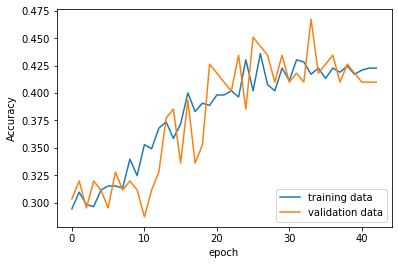

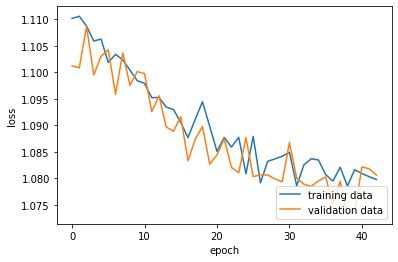

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

# **Pre-Trained Models**

### **VGG16 - Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.applications.vgg16 import preprocess_input


In [ ]:
train_ds = preprocess_input(images) 
valid_ds = preprocess_input(imagesV)

In [ ]:
train_ds[0].shape

(256, 256, 3)

In [ ]:
vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape=images[0].shape)
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 80, 80, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 80, 80, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 40, 40, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 40, 40, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 40, 40, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 20, 20, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
model_vgg = 0
model_vgg = layers.Flatten()(vgg_model.output)
model_vgg = layers.Dense(4, activation='relu')(model_vgg)
model_vgg = layers.Dense(4, activation='relu')(model_vgg)
model_vgg= layers.Dense(3, activation='softmax' )(model_vgg)
model = 0
model = tf.keras.models.Model(vgg_model.input, model_vgg)


In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 80, 80, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 80, 80, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 40, 40, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 40, 40, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 40, 40, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 20, 20, 128)       0   

In [ ]:

model.compile( optimizer ='adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy' ])
history_VGG= model.fit(training_image_generator, validation_data =valid_image_generator, epochs = 64)

Epoch 1/64
17/17 [==============================] - 168s 10s/step - loss: 1.1226 - accuracy: 0.3132 - val_loss: 1.1223 - val_accuracy: 0.2869
Epoch 2/64
17/17 [==============================] - 165s 10s/step - loss: 1.1137 - accuracy: 0.3283 - val_loss: 1.0995 - val_accuracy: 0.3443
Epoch 3/64
17/17 [==============================] - 165s 10s/step - loss: 1.1069 - accuracy: 0.3038 - val_loss: 1.1087 - val_accuracy: 0.2869
Epoch 4/64
17/17 [==============================] - 165s 10s/step - loss: 1.1072 - accuracy: 0.3132 - val_loss: 1.1002 - val_accuracy: 0.3607
Epoch 5/64
17/17 [==============================] - 164s 10s/step - loss: 1.1034 - accuracy: 0.3302 - val_loss: 1.0934 - val_accuracy: 0.3689
Epoch 6/64
17/17 [==============================] - 164s 10s/step - loss: 1.0944 - accuracy: 0.3340 - val_loss: 1.1090 - val_accuracy: 0.3197
Epoch 7/64
17/17 [==============================] - 165s 10s/step - loss: 1.0961 - accuracy: 0.3358 - val_loss: 1.0969 - val_accuracy: 0.3443
Epoch 

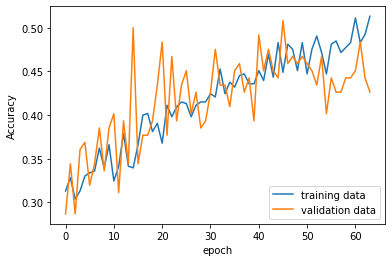

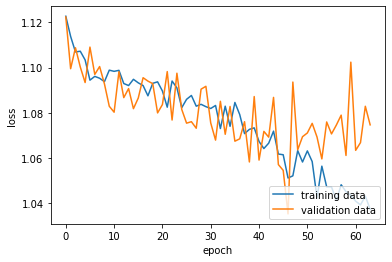

In [ ]:
plt.plot(history_VGG.history['accuracy'])
plt.plot(history_VGG.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history_VGG.history['loss'])
plt.plot(history_VGG.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

### **ResNet - Model**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
input_Shape = Input(shape=(80,80,3))
output_layer1 = Conv2D(32, (4,4), activation='relu')(input_Shape)
for i in range(2):
    output_layer2 = Conv2D(32, (4,4), padding = 'same', activation='relu')(output_layer1)
    output_layer2 = Conv2D(32, (4,4), padding = 'same', activation='relu')(output_layer2)
    output_layer2 = BatchNormalization()(output_layer2)
    output_layer2 = Conv2D(32, (4,4), padding = 'same', activation='relu')(output_layer2)
    output_layer2 = Dropout(0.25)(output_layer2)
    output_layer2 = add([output_layer1, output_layer2])
    output_layer1 = output_layer2
output_layer3 = Flatten()(output_layer2)
output_layer4 = Dense(units = 4, activation = 'relu')(output_layer3)
output_layer6 = Dense(units = 3, activation = 'softmax')(output_layer4)
model_resNet = Model(inputs=input_Shape, outputs=output_layer6)
model_resNet.compile(optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model_resNet.summary())

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_35 (Conv2D)             (None, 77, 77, 32)   1568        ['input_11[0][0]']               
                                                                                                  
 conv2d_36 (Conv2D)             (None, 77, 77, 32)   16416       ['conv2d_35[0][0]']              
                                                                                                  
 conv2d_37 (Conv2D)             (None, 77, 77, 32)   16416       ['conv2d_36[0][0]']              
                                                                                           

In [ ]:
history_resnet = 0
callback_a = ModelCheckpoint(filepath = 'model_resnet.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history_resnet = model_resNet.fit( training_image_generator, epochs = 64, batch_size = 10, validation_data= valid_image_generator,callbacks = [callback_a,callback_b])

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1240 - accuracy: 0.3245
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to model_resnet.hdf5
17/17 [==============================] - 106s 6s/step - loss: 1.1240 - accuracy: 0.3245 - val_loss: 1.0938 - val_accuracy: 0.2812
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.1097 - accuracy: 0.3358
Epoch 2: val_accuracy did not improve from 0.28125
17/17 [==============================] - 106s 6s/step - loss: 1.1097 - accuracy: 0.3358 - val_loss: 1.0941 - val_accuracy: 0.1875
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0992 - accuracy: 0.3245
Epoch 3: val_accuracy improved from 0.28125 to 0.46875, saving model to model_resnet.hdf5
17/17 [==============================] - 106s 6s/step - loss: 1.0992 - accuracy: 0.3245 - val_loss: 1.0956 - val_accuracy: 0.4688
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.1124 - accuracy: 0.4226
Epoch 

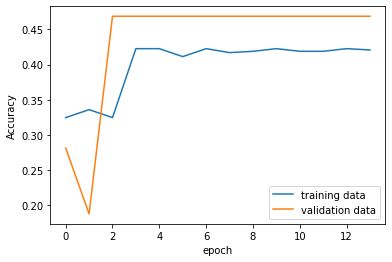

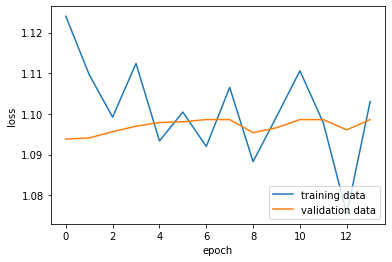

In [ ]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()